In [1]:
import numpy as np

### NumPy

#### np.allclose()
compares two arrays element-wise and returns True if they are equal within a tolerance

In [2]:
a = np.array([1,2,3,4])
b = np.copy(a)
b[0] +=0.001
np.allclose(a,b)

True

Note that it is not symmetric (in rare cases np.allclose(a,b) != np.allclose(b,a))

#### Broadcasting

In [3]:
a = np.array([1,2,3])
b = np.array([0, 1])
a+b

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

Broadcasting is how NumPy solves the problem of arithmetic between
arrays of differing shapes by in effect replicating the smaller array along
the last mismatched dimension, so that they have compatible shapes.
It does this without making needless copies of data and usually leads to
efficient algorithm implementations.

##### Scalar and array

In [4]:
a

array([1, 2, 3])

In [5]:
b = 3
a+b

array([4, 5, 6])

In [7]:
np.array(b)

array(3)

##### Arrays in different dimensions

In [8]:
a = np.eye(5)
a

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [10]:
b = np.arange(5)
b

array([0, 1, 2, 3, 4])

In [12]:
b.shape

(5,)

In [13]:
a+b

array([[1., 1., 2., 3., 4.],
       [0., 2., 2., 3., 4.],
       [0., 1., 3., 3., 4.],
       [0., 1., 2., 4., 4.],
       [0., 1., 2., 3., 5.]])

#### Thumb rules for broadcasting:
1. The arrays dimensions' size are equal or one dimension has the size of 1.


In [14]:
# Will this work?

A = np.zeros((2,3))
b = np.array([2,1])
C = A+b

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [23]:
b = np.arange(2)
A,b
np.transpose(A) + b

array([[0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
# What should we change?

#### Thumb rules for broadcasting:
1. The arrays dimensions' size are equal or one dimension has the size of 1.
2. if all input arrays do not have the same number of dimensions, a "1" will be repeatedly prepended to the shapes of the smaller arrays until all the arrays have the same number of dimensions.

In [24]:
a = np.array([1,2,3,4,5])
b = np.array([1,2,3])
a*b

ValueError: operands could not be broadcast together with shapes (5,) (3,) 

In [32]:
a

array([1, 2, 3, 4, 5])

In [27]:
a_ = a[:, np.newaxis]
a_*b

array([[ 1,  2,  3],
       [ 2,  4,  6],
       [ 3,  6,  9],
       [ 4,  8, 12],
       [ 5, 10, 15]])

In [34]:
print(a)

[1 2 3 4 5]


In [33]:
print(a.shape)
a_ = a.reshape(5,1)
a_*b

(5,)


array([[ 1,  2,  3],
       [ 2,  4,  6],
       [ 3,  6,  9],
       [ 4,  8, 12],
       [ 5, 10, 15]])

In [ ]:
#Will this work?

A = np.random.rand(1,2,3)
b = np.random.rand(2,3)
A + b

### mgrid
NumPy function, that returns an instance of a meshgrid
which could be used for creating coordinate arrays over some function.
Go to mgrid tutorial notebook....

### random
Sometimes, we would like to test code that samples random numbers.
However, debugging is hard when the number are truely random...
#### random.seed()

In [35]:
import random

In [42]:
print(random.randint(25,50))
print(random.randint(25,50))
print(random.randint(25,50))
print(random.randint(25,50))

41
42
47
36


In [48]:
random.seed(30)
print(random.randint(25,50))
print(random.randint(25,50))
print(random.randint(25,50))
print(random.randint(25,50))

42
50
34
44


In [53]:
random.seed(30)
print(random.randint(25,50))
print(random.randint(25,50))
print(random.randint(25,50))
print(random.randint(25,50))

42
50
34
44


### Matplotlib

In [54]:
import matplotlib.pyplot as plt # plt is the convention

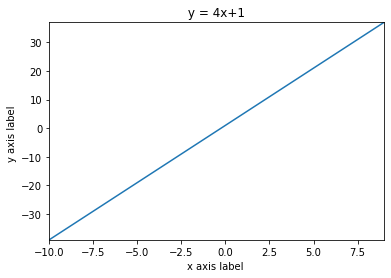

In [55]:
x = np.arange( -10 ,10) # from -10 until 9, steps of 1
y = [4*a+1 for a in x] # y = 4x+1
y = np. array (y) # casting y to np.array , so we could use min ()
#We 'll set our axis to the min/max values of x,y:
plt.axis([x.min() , x.max() , y.min() , y.max() ]) # [-10, 9, -39, 37]
# set axes names and title
plt.plot(x,y)
plt.xlabel('x axis label ')
plt.ylabel('y axis label ')
plt.title(' y = 4x+1 ')
plt.show()

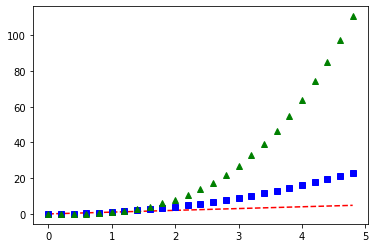

In [56]:
# You can control the design....
# evenly sampled time at 200 ms intervals
t = np.arange (0. , 5., 0.2)
# red dashes : ('r--') r = red , -- = dashed marker
# blue squares : ('bs ') b = blue , s = square marker
# green triangles ('g^') g = green , ^ = truangle
plt.plot(t, t, 'r--', t, t**2 , 'bs ', t, t**3 , 'g^')
plt.show()

#### Subplots
Allows plotting several figures in the same window. Let's say we want to explore how changing the variance affects the gaussian distribution:

As you might recall, the gaussian distribution function is defined by two parameters:

## $f(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

In [57]:
# define our gaussian function
def g(mu,sigma, x):
    return (1/np.sqrt(2.*np.pi*(sigma**2.))) * np.exp(-(((x-mu)**2) /(2*(sigma**2))))
# Define different values of sigma
sigma1 , sigma2 , sigma3 = 0.1 , 0.5 , 2
mu = 0

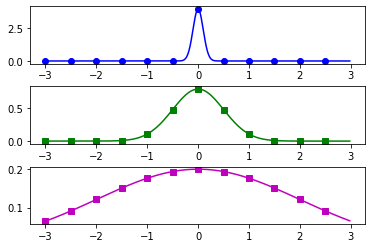

In [58]:
# Define X axis :
# we define two arrays of values for the following reasons
# 1) highlights the value of our function ( every 0.5 points )
# 2) plots our line
x1 = np. arange ( -3.0 , 3.0 , 0.5)
x2 = np. arange ( -3.0 , 3.0 , 0.02)
# First subplot
plt.figure (1) # declare the figure
plt.subplot (311) # 311 -> 3 rows , 1 columns , 1st subplot
plt.plot(x1 , g(0, sigma1 , x1), 'bo ', x2 , g(0, sigma1 , x2),'b') # 'bo ': blue circle markers , 'b ': black line
plt.subplot(312)
plt.plot(x1 , g(0, sigma2 , x1), 'gs ', x2 , g(0, sigma2 , x2),'g') # 'bo ': blue circle markers , 'b ': black line
plt.subplot(313)
plt.plot(x1 , g(0, sigma3 , x1), 'ms ', x2 , g(0, sigma3 , x2),'m') # 'bo ': blue circle markers , 'b ': black line
plt . subplots_adjust ( hspace =0.4) # define space between
plt.show()

### Matplotlib and images
Matplotlib support image operations. While we'll mostly work with OpenCV, it is worth knowing the basics. You can find more on Matplotlib official image tutorial.

#### plt.imread()
load images as NumPy arrays.
Matplotlib rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0.

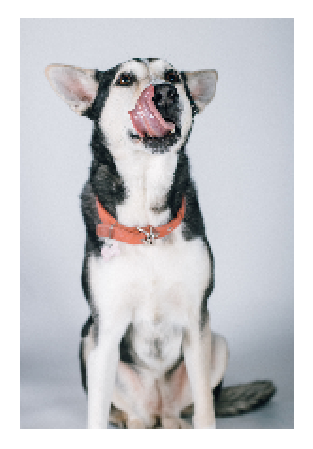

In [59]:
import matplotlib.pyplot as plt
import os
img_dir = r'C:\Users\t-merone\Documents\Studies\CV201\Python-PS\PS 3\python-ps\figs'
image_name = 'nooka.png'
nooka = plt.imread(os.path.join(img_dir, image_name))
fig = plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(nooka)

Useful also for visualizing functions

In [63]:
print(x[0,0],y[0,0])

-3.0 -3.0


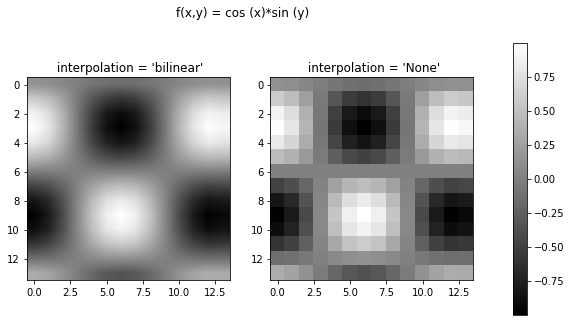

In [60]:
# recall this from the mgrid section
y, x = np.mgrid[-3:4:0.5 , -3:4:0.5]
def f(x,y):
    return np.cos(x)*np. sin(y)

fxy = f(x,y)
# We can explicitly declare the figure and axes
fig,axes = plt.subplots( nrows =2, ncols =1, figsize =(8 , 5))
fig.suptitle("f(x,y) = cos (x)*sin (y)") # main title

# You can choose the type of interpolation between adjacent cells in the ( discrete ) mgrid as well as the 
# color map ( cmap ).
ax = plt.subplot (121)
plt.imshow(fxy , interpolation = 'bilinear', cmap = 'gray')
ax.set_title(" interpolation = 'bilinear'") # set title to this 'ax '

ax = plt.subplot (122)
ax.set_title(" interpolation = 'None'")
plt.imshow(fxy , interpolation ="None", cmap = 'gray') # Note that it is the string " None ", which is different 
# from interpolation = None which uses Python 's built -in constant , None .
# we can play with the anchor 's location to relocate our colorbar
cbar = plt. colorbar (ax=axes , anchor = (2 ,0))
plt.show()

It is sometimes useful, when debugging CV code to view the images
without any interpolation (i.e., look directly at the pixel level).

### OpenCV

In [64]:
# Load colored image
import cv2
img_path = os.path.join(img_dir,'nooka.png')
img = cv2.imread(img_path ,1) # 1 color , 0 grayscale , -1 unchanged
# Display image and destory window after any key is pressed
cv2.imshow('Doggie ',img) # title , image
cv2.waitKey(0) # wait until any key is pressed
cv2.destroyAllWindows()

In [65]:
# Convert to grayscale
img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY )
# notice anything weird ?
cv2.imshow('Gray doggie', img_gray ) # title , image
cv2.waitKey(0) # wait until any key is pressed
cv2.destroyAllWindows()
# Saving
cv2.imwrite('gray_nooka .png', img_gray ) # (new file name ,image to save )

True

OpenCV uses BGR color channel instead of RGB.

When working with OpenCV it's ok, but if we wish to work with
matplotlib as well, this will happen:

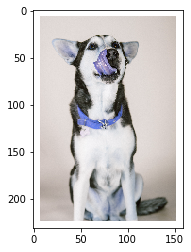

In [66]:
# Load colored image
img = cv2.imread(img_path,1) # 1 color , 0 grayscale , -1 unchanged
plt.imshow(img)
# Notice we 've used plt. imshow () and not cv2. imshow ()

So, we'd usually want to convert BGR to RGB:

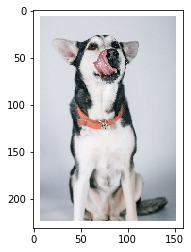

In [67]:
img = cv2.imread(img_path ,1)
# default is BGR not RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# We can also save images with matplotlib
plt.imsave('image_rgb.png', img_rgb)
plt.imshow(img_rgb)

#### Resizing images...

In [68]:
# Loading image
img = cv2.cvtColor(img , cv2 . COLOR_BGR2RGB )


original shape : 231 159
new shape : 77 53


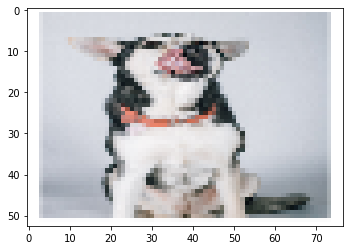

In [69]:
# This image is a bit too big. So we will resize it.
nRows , nCols = img. shape [:2]
print ('original shape :',nRows , nCols )
# original shape : 521 550
nRows /= 3
nCols /= 3
# Note that even if the returned number is integer , it automatically transfomed into float
nRows = int( nRows )
nCols = int( nCols )
print ('new shape :',nRows , nCols )
# new shape : 130 137
img = cv2. resize (img ,( nRows , nCols ))
plt.imshow (img )